<h1 style='color:red' align='center'>Predict the Species of Penguins </h1>

<h2 style='color:black'  align='center'> Importing Packages and Dataset </h2>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
from sklearn.svm import SVC 

In [7]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix ,plot_confusion_matrix
from sklearn.metrics import roc_auc_score ,roc_curve

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [9]:
import warnings
warnings.filterwarnings('ignore')

In [10]:
data = pd.read_csv('penguins.csv')
data.head()

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
0,39.1,18.7,181.0,3750.0,0
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
3,NaN,NaN,NaN,NaN,0
4,36.7,19.3,193.0,3450.0,0


**The dataset contains the following columns:**
 - CulmenLength: The length in mm of the penguin's culmen (bill).
 - CulmenDepth: The depth in mm of the penguin's culmen.
 - FlipperLength: The length in mm of the penguin's flipper.
 - BodyMass: The body mass of the penguin in grams.


 - Species: An integer value that represents the species of the penguin.
            The dataset includes three possible species :
            * 0 : Adelie
            * 1 : Gentoo
            * 2 : Chinstrap  

<h2 style='color:black'  align='center'> Data Processing and EDA </h2>

In [11]:
data.shape

(344, 5)

In [12]:
data.dtypes

CulmenLength     float64
CulmenDepth      float64
FlipperLength    float64
BodyMass         float64
Species            int64
dtype: object

In [13]:
data.isnull().sum()

CulmenLength     2
CulmenDepth      2
FlipperLength    2
BodyMass         2
Species          0
dtype: int64

In [14]:
data[data.isnull().any(axis=1)]

,CulmenLength,CulmenDepth,FlipperLength,BodyMass,Species
3,NaN,NaN,NaN,NaN,0
271,NaN,NaN,NaN,NaN,1


- There are two rows that contain no feature values at all (NaN stands for "not a number"), so these won't be useful in training a model. Let's discard them from the dataset.

In [15]:
data = data.dropna()

In [16]:
data.isnull().sum()

CulmenLength     0
CulmenDepth      0
FlipperLength    0
BodyMass         0
Species          0
dtype: int64

In [17]:
data['Species'].value_counts()

0    151
1    123
2     68
Name: Species, dtype: int64

In [18]:
data['Species'].value_counts(normalize=True)

0    0.441520
1    0.359649
2    0.198830
Name: Species, dtype: float64

In [19]:
X = data.drop(['Species'] ,axis=1)
y = data['Species']

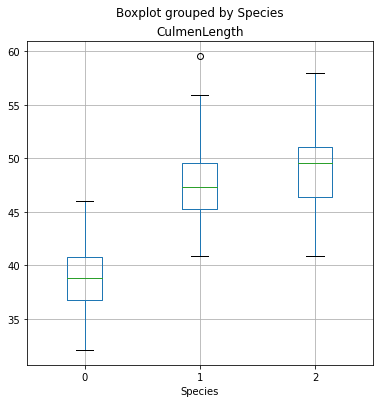

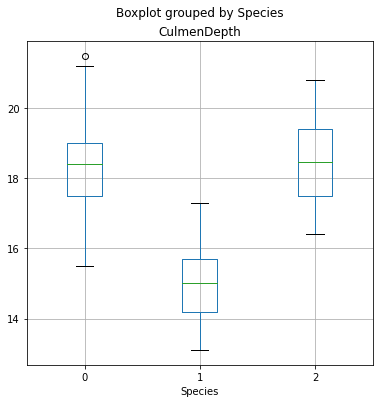

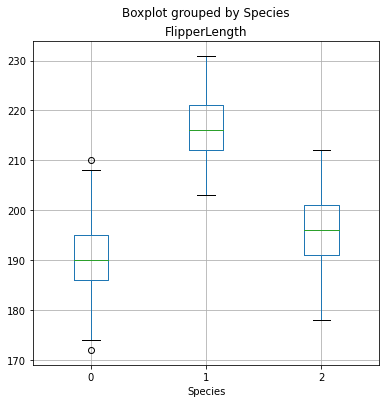

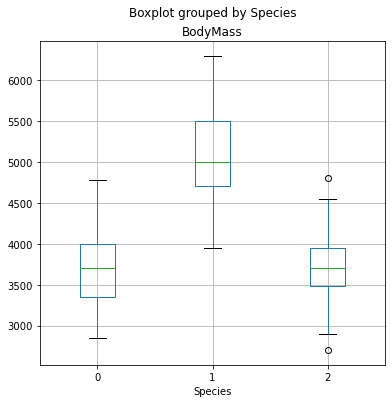

In [20]:
for feat in X.columns:
    data.boxplot(column=feat ,by='Species' ,figsize=(6,6))
    plt.title(feat)
    plt.show()

**From the box plots ,**
 - it looks like species 0 and 2 (Amelie and Chinstrap) have similar data profiles for culmen depth, flipper length, and body mass, but Chinstraps tend to have longer culmens. 
 
 - Species 1 (Gentoo) tends to have fairly clearly differentiated features from the others
 
 which should help us train a good classification model.

<h2 style='color:black'  align='center'>  Data Split </h2>

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [22]:
numeric_features = [0,1,2,3]

numeric_transformer = Pipeline([
                                 ('scaler', StandardScaler())
                               ])

In [23]:
preprocessor = ColumnTransformer([
                                   ('preprocess', numeric_transformer, numeric_features)
                                 ])

<h2 style='color:black'  align='center'> Modeling </h2>

<h3 style='color:blue'  align='left'>1.Logistic Regression</h3>

In [24]:
reg = 0.1

pipeline = Pipeline([
                      ('preprocessor' ,preprocessor) ,
                      ('LogisticRegression' ,LogisticRegression(C=1/reg ,solver='lbfgs' ,multi_class='auto'))
                   ])

In [25]:
lr = pipeline.fit(X_train,y_train)

In [26]:
lr.fit(X_train ,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('preprocess',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3])])),
                ('LogisticRegression', LogisticRegression(C=10.0))])

In [27]:
lr_pred = lr.predict(X_test)

In [28]:
accuracy_score(y_test,lr_pred)

1.0

In [29]:
lr_score = accuracy_score(y_test,lr_pred)

In [30]:
confusion_matrix(y_test,lr_pred)

array([[50,  0,  0],
       [ 0, 35,  0],
       [ 0,  0, 18]], dtype=int64)

In [31]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        18

    accuracy                           1.00       103
   macro avg       1.00      1.00      1.00       103
weighted avg       1.00      1.00      1.00       103



- With binary classification we could focus on the scores for the positive class



- With multiple class we need to look at an overall metric (either the macro or weighted average) to get a sense of how well the model performs across all three classes.

When dealing with multiple classes, it's generally more intuitive to visualize this as a heat map

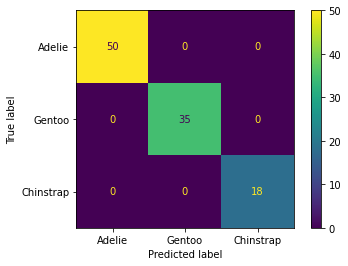

In [32]:
plot_confusion_matrix(
                      lr,
                      X_test,
                      y_test ,
                      display_labels = ['Adelie', 'Gentoo', 'Chinstrap']
                     )

In the case of a multiclass classification model, a single ROC curve showing true positive rate vs false positive rate is not possible. 

However, you can use the rates for each class in a One vs Rest (OVR) comparison to create a ROC chart for each class.

In [33]:
lr_prob = lr.predict_proba(X_test)

In [34]:
penguin_classes = ['Adelie', 'Gentoo', 'Chinstrap']

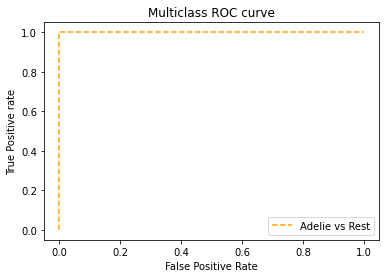

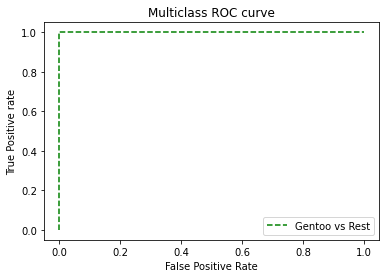

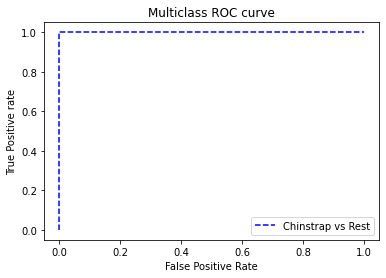

In [35]:
fpr = {}
tpr = {}
threshold = {}

for i in range(len(penguin_classes)) :
    fpr[i],tpr[i],threshold[i] = roc_curve(y_test ,lr_prob[:,i],pos_label=i)
    

color = ['orange','green','blue']
for i in range(len(penguin_classes)):
    plt.plot(fpr[i], tpr[i] ,linestyle='--' ,color=color[i] ,label=penguin_classes[i]+' vs Rest')
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive rate')

    plt.legend(loc='best')
    plt.title('Multiclass ROC curve')

    plt.show()

In [36]:
lr_auc = roc_auc_score(y_test,lr_prob, multi_class='ovr')
print('Average AUC:', lr_auc)

Average AUC: 1.0


<h3 style='color:blue'  align='left'>2.Support Vector</h3>

In [37]:
pipeline = Pipeline([
                      ('preprocessor' ,preprocessor) ,
                      ('SVC' ,SVC(probability=True))
                   ])

In [38]:
sv = pipeline.fit(X_train ,y_train)

In [39]:
sv_pred = sv.predict(X_test)

In [40]:
sv_prob = sv.predict_proba(X_test)

In [41]:
confusion_matrix(y_test, sv_pred)

array([[50,  0,  0],
       [ 0, 35,  0],
       [ 1,  0, 17]], dtype=int64)

In [42]:
accuracy_score(y_test, sv_pred)

0.9902912621359223

In [43]:
sv_score = accuracy_score(y_test, sv_pred)

In [44]:
print(classification_report(y_test, sv_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      1.00      1.00        35
           2       1.00      0.94      0.97        18

    accuracy                           0.99       103
   macro avg       0.99      0.98      0.99       103
weighted avg       0.99      0.99      0.99       103



In [45]:
sv_auc = roc_auc_score(y_test,sv_prob, multi_class='ovr')
print('Average AUC:', sv_auc)

Average AUC: 1.0


<h3 style='color:blue'  align='left'>3.Random Forest</h3>

In [46]:
pipeline = Pipeline([
                      ('preprocessor' ,preprocessor) ,
                      ('Random Forest' ,RandomForestClassifier(n_estimators=100))
                   ])

In [47]:
rf = pipeline.fit(X_train,y_train)

In [48]:
rf_pred = rf.predict(X_test)

In [49]:
rf_prob = rf.predict_proba(X_test)

In [50]:
confusion_matrix(y_test, rf_pred)

array([[50,  0,  0],
       [ 0, 35,  0],
       [ 0,  0, 18]], dtype=int64)

In [51]:
accuracy_score(y_test, rf_pred)

1.0

In [52]:
rf_score = accuracy_score(y_test, rf_pred)

In [53]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        18

    accuracy                           1.00       103
   macro avg       1.00      1.00      1.00       103
weighted avg       1.00      1.00      1.00       103



In [54]:
rf_auc = roc_auc_score(y_test ,rf_prob ,multi_class='ovr')
print('AUC score : ',str(rf_auc))

AUC score :  1.0


In [55]:
model_performance = pd.DataFrame({
                                    'Model'    : ['Logistic Regression','Support Vector','RandomForest'] ,
                                    'Accuracy' : [lr_score ,sv_score,rf_score] ,
                                    'AUC Score': [lr_auc ,sv_auc ,rf_auc] 
                                })

model_performance

,Model,Accuracy,AUC Score
0,Logistic Regression,1.000000,1.0
1,Support Vector,0.990291,1.0
2,RandomForest,1.000000,1.0
